# Part 2 - Training and Evaluation

In [204]:
# Import related libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

### 1. Load and split reprocessed data
Let's take a look at the data we saved in part 1. Load the weekly aggregated data and check datatypes, features.

In [191]:
# Load the weekly dataset from previous processed file
df = pd.read_csv('./../../resources/cleaned_datasets/weekly.csv')

# Display the first few rows of the dataset
df.head()

,Order Date,Sales,Quantity,Discount
0,2014-01-12,138.608,6,0.60
1,2014-01-19,523.063,13,0.85
2,2014-01-26,588.018,23,0.20
3,2014-02-02,623.666,5,0.35
4,2014-02-09,14.560,2,0.00


In [192]:
# More details of the dataset, features, datatypes, count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  208 non-null    object 
 1   Sales       208 non-null    float64
 2   Quantity    208 non-null    int64  
 3   Discount    208 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


- The dataset contains 208 entries with 4 columns
- There are three data types: `float64`, `int64` and `object`, `Order Date` is `object`, `Sales` and `Discount` are `float64`, `Quantity` is `int64`
- There are four features: `Order Date`, `Sales`, `Quantity` and `Discount`

**Our Target**
we will use `Sales` as the target variable, predict the sales for next 4 weeks by `Quantity`, `Discount` and `Order Date`.

Before splitting the data, let's handle missing values first

In [193]:
miss_data = df.isnull().sum().to_frame()
print(miss_data)

            0
Order Date  0
Sales       0
Quantity    0
Discount    0


The output shows there is no missing values in features. Next, we transform Order Date object to datetime and finally numerical.

In [194]:
# Convert Order Date to numerical
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')
df['Order Date'] = df['Order Date'].map(dt.datetime.toordinal)

Now let's split the dataset into training and testing sets using an 70 - 30 split, there will be 
- Training Set: 146 samples
- Testing Set: 62 samples

In [195]:
# Define features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Choose an algorithm
**Linear Regression** is a simple yet powerful algorithm that models the relationship between the dependent variable and one or more independent variables by fitting a linear equation.

#### How Linear Regression Works
Linear regression works by finding the best-fitting line that minimizes the sum of squared differences between the actual and predicted values.

### 3. Train and test a model
We'll train the Linear Regression model using the training data and evaluate its performance on the test data.

In [199]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

def smape(y_true, y_pred):
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Calculate the numerator (absolute difference)
    numerator = np.abs(y_true - y_pred)
    # Calculate the denominator (average of absolute actual and predicted values)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # Calculate SMAPE
    smape_value = np.mean(numerator / denominator) * 100
    return smape_value

# Calculate performance metrics
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)
rmse_train = mean_squared_error(y_train, train_predictions, squared=False)
rmse_test = mean_squared_error(y_test, test_predictions, squared=False)
smape_train = smape(y_train, train_predictions)
smape_test = smape(y_test, test_predictions)
mape_train = np.mean(np.abs((y_train - train_predictions) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test, smape_train, smape_test, mape_train, mape_test

(191906.63676450754,
 293902.17535158095,
 438.0714973203661,
 542.1274530510154,
 0.742371711700164,
 0.6835507820089748,
 38.692996330872546,
 34.61537426844418,
 77.17599300886651,
 58.33153925293067)

Here the performance metrics for the Linear Regression model:
- Training Set:
  - Mean Squared Error(MSE): 191906.63676450754 
  - Root Mean Squared Error(RMSE): 438.0714973203661
  - R² Score: 0.742371711700164
  - Symmetric mean absolute percentage error(SMAPE): 38.692996330872546
  - Mean absolute percentage error(MAPE): 77.17599300886651
- Test Set:
  - Mean Squared Error(MSE): 293902.17535158095
  - Root Mean Squared Error(RMSE): 542.1274530510154
  - R² Score: 0.6835507820089748
  - Symmetric mean absolute percentage error(SMAPE): 34.61537426844418
  - Mean absolute percentage error(MAPE): 58.33153925293067

This model has 0.68 accuracy of prediction on test dataset and 0.74 accuracy on training dataset.

### 4. Evaluate the model
Interpretation of Metrics:
- Mean Squared Error(MSE): The average of the squared differences between the predicted and actual values. A lower value indicates better model performance.
- Root Mean Squared Error(RMSE): The square root of MSE, providing a measure of the prediction error in the same units as the target variable. Lower values indicate better performance.
- R2 Score: Represents the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model performance.
- Symmetric mean absolute percentage error(SMAPE): It is an accuracy measure based on percentage (or relative) errors which provides a symmetric and more balanced view of the forecasting error by considering both the actual and forecasted values in its denominator. It is especially useful if the data contains both high and low values.
- Mean absolute percentage error(MAPE): This metric provides a direct understanding of how far off the predictions are on average, as a percentage of the actual values. For example, a MAPE of 10% means that the model's predictions are, on average, 10% off from the actual values.

Let's visualize the model's actual and predicted sales

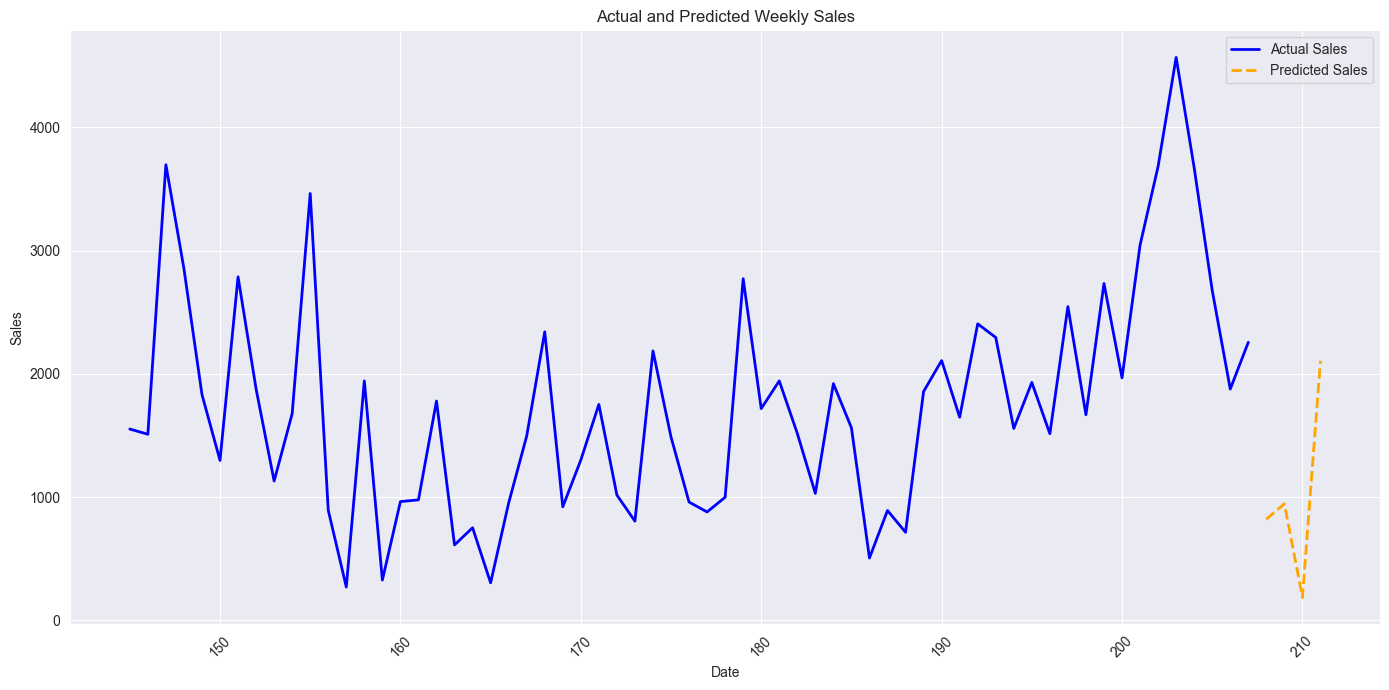

In [235]:
# Store the test dataset
results = df.iloc[int(len(df) * 0.7):].copy()
# Select four rows indicate 4 weeks sales data
predicted_data = pd.DataFrame(test_predictions, index=results.index + len(results), columns=['Predicted Sales']).iloc[:4]
# Append predicted data to test dataset
results = results.join(predicted_data, how='outer')

# Visualization the actual sales and 4 week predicted sales
plt.figure(figsize=(14,7))
sns.lineplot(x=results.index, y='Sales', data = results, label='Actual Sales', color='blue', linewidth=2)
sns.lineplot(x=results.index, y='Predicted Sales', data = results, label='Predicted Sales', color='orange', linestyle='--', linewidth=2)
plt.title('Actual and Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Summary

Let's summarize the steps taken and the findings:
1. Data Loading and Preprocessing: We load the weekly sales dataset and identified the target and feature variables, data types. Then look if there is any missing value and convert `Order Date` to numeric to fit in our model.
2. Splitting Data for training: We split the dataset into training and testing sets using a 70 - 30 split.
3. Algorithm Selection: We chose Linear Regression for its simplicity and effectiveness for regression tasks.
4. Model Training and Testing: We trained the Linear Regression model on the training data and evaluated it on the test data. The model achieved an R² score of 0.68, indicating that it explains 68% of the variance in sales.
5. Model Evaluation: We calculated the MSE,RMSE, R² score, SMAPE, MAPE to evaluate the model's performance. A plot of actual and predicted sales was created to visualize the model's prediction.
6. During the training, we found the sales data is seasonal and cyclical
7. `Quantity` appeared to contribute positively to the sales
8. Although the linear regression model performed well, there were noticeable discrepancies between predicted and actual sales

Future Study:
1. Consider experimenting with more sophisticated models like ARIMA to capture potential non-linear relationships and seasonality in the data
2. Implement cross-validation techniques to obtain a more robust estimate of the model's performance and generalization ability  

In a linear regression model, the coefficients represent the relationship between each independent variable (feature) and the dependent variable (target). Let's take a look at the coefficients:

In [236]:
pd.DataFrame(linear_model.coef_, X.columns, columns = ['Coefficient'])[:-1]

,Coefficient
Order Date,-0.078454
Quantity,39.190242


1. Quantity (coefficient: 39.19): For each additional unit sold, weekly sales are expected to increase by approximately 39.19. A positive coefficient indicates that an increase in quantity has a positive impact on sales,which means selling more units generally results in higher sales revenue.
2. Order Date (coefficient: -0.078): Here we use Order Date as the index, so we should not count the Order Date into relationship consideration.